# ノック71 - 人間関係のネットワークの可視化

In [3]:
import pandas as pd
import numpy as np
import random

あるブランドのSNS上での影響力を分析していく。  
SNS上での顧客同士のつながりや使用率のデータを用いていく。

まずは使用する全データを読み込む。

In [2]:
# リピーターがSNSのリピーター同士で繋がっているかどうか(20人のみ)
# つながっている場合は1

twenty = pd.read_csv("links.csv")
twenty = twenty.pivot_table(index = "Unnamed: 0")
twenty.head()

,Node0,Node1,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Node11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# SNSのリピーター同士で繋がっているかどうか(全リピーター540人)

all_mem = pd.read_csv("links_members.csv")
all_mem.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# リピーターが月毎にSNSにログインしているかどうか
# ログインしている時は1

info = pd.read_csv("info_members.csv")
info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


次に、networkxを用いてtwentyのつながりを可視化していく。

In [5]:
import networkx as nx
from itertools import product 

In [6]:
twenty.head()

,Node0,Node1,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Node11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# index, columnsから"Node"という文字を省く

twenty = twenty.rename(index = lambda x: x.replace("Node", ""),columns = lambda x: x.replace("Node", ""))
twenty.head()

,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# nodes同士のつながり(枝)を作成する

result_list = list([])

for i in range(len(twenty)):
    nodes_list = twenty.loc[twenty.iloc[i,:] == 1, twenty.index[i]].index
    nodes_combi = list(product(twenty.index[i], nodes_list))
    result_list = result_list + nodes_combi

result_list


[('0', '15'),
 ('0', '5'),
 ('1', '11'),
 ('1', '13'),
 ('1', '16'),
 ('1', '5'),
 ('1', '11'),
 ('1', '2'),
 ('1', '4'),
 ('1', '7'),
 ('0', '11'),
 ('0', '2'),
 ('0', '4'),
 ('0', '7'),
 ('1', '1'),
 ('1', '10'),
 ('1', '1'),
 ('1', '10'),
 ('1', '13'),
 ('1', '16'),
 ('1', '9'),
 ('2', '13'),
 ('2', '16'),
 ('2', '9'),
 ('1', '1'),
 ('1', '12'),
 ('1', '18'),
 ('1', '8'),
 ('3', '1'),
 ('3', '12'),
 ('3', '18'),
 ('3', '8'),
 ('1', '8'),
 ('4', '8'),
 ('1', '0'),
 ('1', '19'),
 ('1', '3'),
 ('1', '4'),
 ('5', '0'),
 ('5', '19'),
 ('5', '3'),
 ('5', '4'),
 ('1', '1'),
 ('1', '12'),
 ('1', '17'),
 ('6', '1'),
 ('6', '12'),
 ('6', '17'),
 ('1', '16'),
 ('1', '18'),
 ('1', '6'),
 ('1', '7'),
 ('7', '16'),
 ('7', '18'),
 ('7', '6'),
 ('7', '7'),
 ('1', '13'),
 ('1', '17'),
 ('1', '5'),
 ('8', '13'),
 ('8', '17'),
 ('8', '5'),
 ('1', '15'),
 ('9', '15'),
 ('2', '10'),
 ('2', '4'),
 ('2', '5'),
 ('2', '6'),
 ('3', '15'),
 ('3', '7'),
 ('4', '10'),
 ('4', '15'),
 ('4', '2'),
 ('4', '7'),
 (

In [9]:
unique_rl = []
for j in range(len(result_list)):
    if result_list[j][0] != result_list[j][1]:
        unique_rl.append(result_list[j])
unique_rl

[('0', '15'),
 ('0', '5'),
 ('1', '11'),
 ('1', '13'),
 ('1', '16'),
 ('1', '5'),
 ('1', '11'),
 ('1', '2'),
 ('1', '4'),
 ('1', '7'),
 ('0', '11'),
 ('0', '2'),
 ('0', '4'),
 ('0', '7'),
 ('1', '10'),
 ('1', '10'),
 ('1', '13'),
 ('1', '16'),
 ('1', '9'),
 ('2', '13'),
 ('2', '16'),
 ('2', '9'),
 ('1', '12'),
 ('1', '18'),
 ('1', '8'),
 ('3', '1'),
 ('3', '12'),
 ('3', '18'),
 ('3', '8'),
 ('1', '8'),
 ('4', '8'),
 ('1', '0'),
 ('1', '19'),
 ('1', '3'),
 ('1', '4'),
 ('5', '0'),
 ('5', '19'),
 ('5', '3'),
 ('5', '4'),
 ('1', '12'),
 ('1', '17'),
 ('6', '1'),
 ('6', '12'),
 ('6', '17'),
 ('1', '16'),
 ('1', '18'),
 ('1', '6'),
 ('1', '7'),
 ('7', '16'),
 ('7', '18'),
 ('7', '6'),
 ('1', '13'),
 ('1', '17'),
 ('1', '5'),
 ('8', '13'),
 ('8', '17'),
 ('8', '5'),
 ('1', '15'),
 ('9', '15'),
 ('2', '10'),
 ('2', '4'),
 ('2', '5'),
 ('2', '6'),
 ('3', '15'),
 ('3', '7'),
 ('4', '10'),
 ('4', '15'),
 ('4', '2'),
 ('4', '7'),
 ('4', '8'),
 ('5', '0'),
 ('5', '1'),
 ('5', '18'),
 ('5', '2'),
 

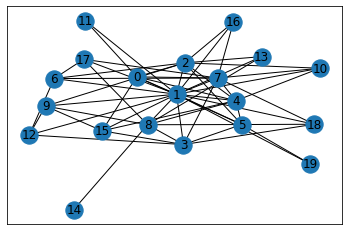

In [10]:
# networkxを用いて可視化する

G = nx.Graph()
G.add_nodes_from(twenty.columns[i] for i in range(len(twenty.columns)))
G.add_edges_from(unique_rl)
nx.draw_networkx(G)

# ノック72 - 口コミによる情報伝播の様子を可視化する

次に、一つの口コミが時間によってどれほど伝播していくのかを可視化する。  
  
条件としては、以下の通り

①一つの口コミは、ネットワーク上で繋がっている人に毎月1/10の確率で伝播する  
②口コミが伝播した点・辺は赤くなる  
  
以上を可視化し、月毎にどのように口コミが伝わっていくのかを可視化する。

In [12]:
import matplotlib.pyplot as plt

In [12]:
df_links = pd.read_csv("links.csv")
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


1/10の確率で1を返し、それ以外0を返す関数の作成

In [13]:
def link_determinator(percentage):
    if random.random() <= percentage:
        return 1
    else :
        return 0    

この後の流れとしては、  
①現在赤くなっているノードを示す、0と1から成るarrayを作成  
②1のノードとつながっているノードが0の場合、1/10の確率で1に変換させる  
③②をt回繰り返す

In [14]:
# 0だけが1になっているarrayを作成

first_array = np.zeros(len(df_links.index))
first_array[0] = 1
first_array

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [15]:
# 1になっている数値とつながっているノードが0だった場合は1/10で1に

def making_next_array(first_array,percentage):
    for i in range(len(df_links.index)):
        node_name = "Node" + str(i)
        if first_array[i] == 1:
            for j in range(len(df_links.index)): 
                if df_links[node_name].iloc[j] == 1:
                    if link_determinator(percentage) == 1:
                        first_array[j] = 1
    return first_array

In [16]:
# 上記の処理をt回繰り返す

total = 50

first_array = np.zeros(len(df_links.index))
first_array[0] = 1
result_array = []

In [17]:
for t in range(total):
    first_array = making_next_array(first_array, 0.1)
    result_array.append(first_array.copy())

以上の結果を描画する

In [18]:
# ドットの色のアレイを作成

def dots_color(t):
    color_lst = []
    for i in range(len(df_links.index)):
        if result_array[t][i] == 1:
            color_lst.append("orangered")
        else : 
            color_lst.append("cornflowerblue")
    return color_lst

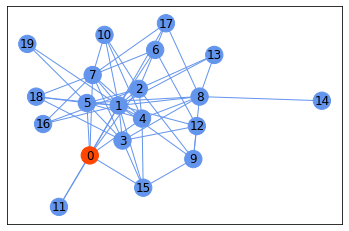

In [19]:
# 描画 (1カ月目)

t = 1

nx.draw_networkx(G, node_color = dots_color(t), edge_color = "cornflowerblue")

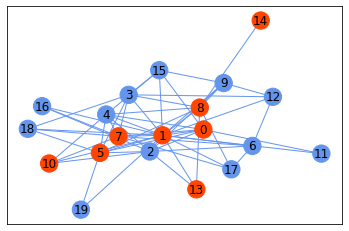

In [20]:
# 描画 (10カ月目)

t = 10

nx.draw_networkx(G, node_color = dots_color(t), edge_color = "cornflowerblue")

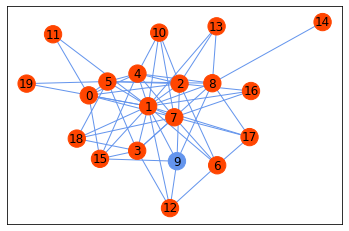

In [21]:
# 描画 (36カ月目)

t = 36

nx.draw_networkx(G, node_color = dots_color(t), edge_color = "cornflowerblue")

36カ月目には口コミによってほぼ全ての人に情報が伝わったのが分かる。

# ノック73 口コミ数の時系列変化をグラフ化 

ここでは、月毎にどのように口コミが広がっていったかを可視化する。

横軸...月  
縦軸...口コミが伝播した人の数

In [22]:
#月のアレイを作成

total_array = range(0,50)

In [23]:
# 口コミが伝播した人の数

total_number=[]
for i in total_array:
    total_number.append(result_array[i].sum())

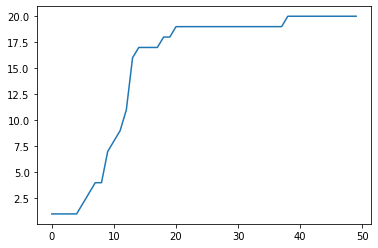

In [24]:
plt.plot(total_array, total_number)

# ノック74 会員数の時系列変化をシミュレーション

今回は、上記の例がスポーツジムの会員数の推移だと過程する。  
なので、月ごとに会員数がどのように増加していくのかをシミュレーションする、という事になる。  

今回は、「5%の確率で突然退会する(アレイの数字が0になる)」という事が起こると想定する。

ノック72のmaking_next_array(first_array,percentage)に、アレイの数が1の人は5%の確率で0になる、という動作を加える

In [25]:
def nxtarray_delete(first_array,percentage):
    for i in range(len(df_links.index)):
        node_name = "Node" + str(i)
        if first_array[i] == 1:
            for j in range(len(df_links.index)): 
                if df_links[node_name].iloc[j] == 1:
                    if link_determinator(percentage) == 1:
                        first_array[j] = 1
    for k in range(len(first_array)):
        if first_array[k] == 1:
            if link_determinator(0.05) == 1:
                first_array[k] = 0
    return first_array

これを用いて、ノック72の容量で行っていく

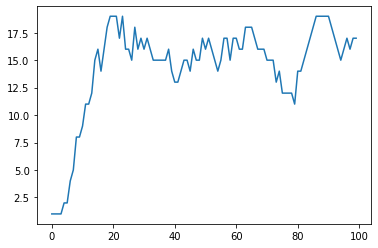

In [26]:
# 処理をt回繰り返す

total = 100

first_array = np.zeros(len(df_links.index))
first_array[0] = 1
result_array = []

# t別のアレイを作成する

for t in range(total):
    first_array = nxtarray_delete(first_array, 0.1)
    result_array.append(first_array.copy())
    
#月のアレイを作成
month_array = range(0,100)

# 口コミで増えていった会員数
total_number=[]
for i in month_array:
    total_number.append(result_array[i].sum())
    
# 描画

plt.plot(month_array, total_number)

このようにゆるやかに上昇していき、ある程度の人数は保たれていく事が分かる。

次に、もし退会率が20%だった場合を見てみる

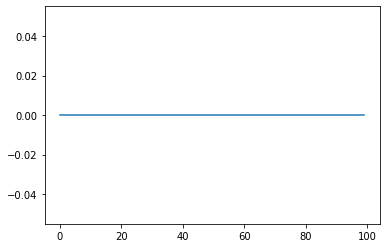

In [27]:
def nxtarray_delete_20(first_array,percentage):
    for i in range(len(df_links.index)):
        node_name = "Node" + str(i)
        if first_array[i] == 1:
            for j in range(len(df_links.index)): 
                if df_links[node_name].iloc[j] == 1:
                    if link_determinator(percentage) == 1:
                        first_array[j] = 1
    for k in range(len(first_array)):
        if first_array[k] == 1:
            if link_determinator(0.2) == 1:
                first_array[k] = 0
    return first_array

total = 100

first_array = np.zeros(len(df_links.index))
first_array[0] = 1
result_array = []

for t in range(total):
    first_array = nxtarray_delete_20(first_array, 0.1)
    result_array.append(first_array.copy())

month_array = range(0,100)

total_number=[]
for i in month_array:
    total_number.append(result_array[i].sum())
    
plt.plot(month_array, total_number)

このように全く会員が伸びない事が分かる。

# ノック75 - パラメータの全体像を「相図」を見て把握する

ノック74までで用いた「口コミの起こる確率(口コミ率)」と「消滅率」を変化させて、それぞれ100カ月後にどのように会員数が変動するかをヒートマップで表す。

まずは  
口コミ率 = 0.15  
消滅率 = 0.1  
での100カ月後の会員数を表示。

In [28]:
l = 0.15
m = 0.1

def kuchikomi_delete(l,m):
    def various_delete(first_array,percentage):
        for i in range(len(df_links.index)):
            node_name = "Node" + str(i)
            if first_array[i] == 1:
                for j in range(len(df_links.index)): 
                    if df_links[node_name].iloc[j] == 1:
                        if link_determinator(percentage) == 1:
                            first_array[j] = 1
        for k in range(len(first_array)):
            if first_array[k] == 1:
                if link_determinator(m) == 1:
                    first_array[k] = 0
        return first_array

    total = 100

    first_array = np.zeros(len(df_links.index))
    first_array[0] = 1
    result_array = []

    for t in range(total):
        first_array = various_delete(first_array, l)
        result_array.append(first_array.copy())

    month_array = range(0,100)

    total_number=[]
    for i in month_array:
        total_number.append(result_array[i].sum())
    
    return total_number[-1]

kuchikomi_delete(l,m)

0.0

次は、kuchikomiとshometsuをそれぞれindex, columnsに持つDFとそのHeat Mapを作成する

In [56]:
kuchikomi = np.arange(0,1,0.05).round(2)
shometsu = np.arange(0,1,0.05).round(2)

final_number = []
for i in kuchikomi:
    each_number = []
    for j in shometsu:
        each_number.append(kuchikomi_delete(i,j))
    final_number.append(each_number)

In [57]:
ks_df = pd.DataFrame(final_number)
ks_df.index = shometsu
ks_df.columns = kuchikomi
ks_df

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.05,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,20.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.15,20.0,18.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.20,20.0,0.0,0.0,13.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,20.0,18.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.30,20.0,18.0,19.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.35,20.0,17.0,0.0,14.0,14.0,10.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.40,20.0,19.0,14.0,17.0,13.0,0.0,14.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.45,20.0,16.0,18.0,16.0,14.0,12.0,15.0,7.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
import seaborn as sns

Text(33.0, 0.5, 'Shometsu')

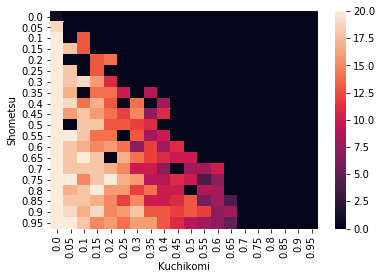

In [60]:
# heatmapで描画

sns.heatmap(ks_df)
plt.xlabel("Kuchikomi") 
plt.ylabel("Shometsu") 

これより、口コミ率が高くても消滅率が高いと会員が残りづらい事が分かる。  
逆に、口コミ率が低くても、消滅率も低ければ相当数の会員が残る事が分かる。

# ノック76 - 実データの読み込み

ここから実データを用いていく。  


In [10]:
df_mem_links = pd.read_csv("links_members.csv")
df_mem_links = df_mem_links.pivot_table(index = "Unnamed: 0")
df_mem_links.head()

,Node0,Node1,Node10,Node100,Node101,Node102,Node103,Node104,Node105,Node106,...,Node90,Node91,Node92,Node93,Node94,Node95,Node96,Node97,Node98,Node99
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Node1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Node10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Node100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
df_mem_info = pd.read_csv("info_members.csv")
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


df_mem_links...ジムの540人の会員のお互いのつながり  
df_mem_info...540人の2年に渡る利用状況(1が利用月)

# ノック77 - リンク数の分布の可視化(ここから自身の解答)

各ユーザーのリンク数の総数を総計して、ヒストグラムで表す。

(array([  7.,  19.,  38.,  59., 142., 169.,  56.,  22.,  19.,   9.]),
 array([ 11. ,  29.7,  48.4,  67.1,  85.8, 104.5, 123.2, 141.9, 160.6,
        179.3, 198. ]),
 <a list of 10 Patch objects>)

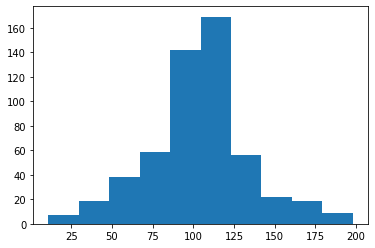

In [15]:
link_numbers = []

for i in range(len(df_mem_links.columns)):
    node_name = "Node" + str(i)
    link_numbers.append(df_mem_links[node_name].sum())

plt.hist(link_numbers)